In [26]:
#Vasavi Bondapalli
#Z1915865

In [80]:
import math 
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [81]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,  pipeline, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from heapq import nlargest
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [82]:
data=pd.read_excel('AmesHousing.xls')

In [83]:

target = data['SalePrice']
categorical = data.select_dtypes(exclude=['int64','float64'])
categorical_name = list(categorical)
cat_features = data.select_dtypes(include=['object']).columns
#data= data.drop(['SalePrice'], axis=1)
df = data.select_dtypes(exclude=['object'])


numeric_features = list(df)

In [84]:
data1=data.fillna('NA')

In [85]:
#Univariate Analysis
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
continuous_feature.append('Pool Area')

In [86]:
#1. Visualize the univariate distribution of each continuous variable, and the distribution of the target. 
#Did you notice anything?
#Is there something that might require special treatment? [10 Marks] 

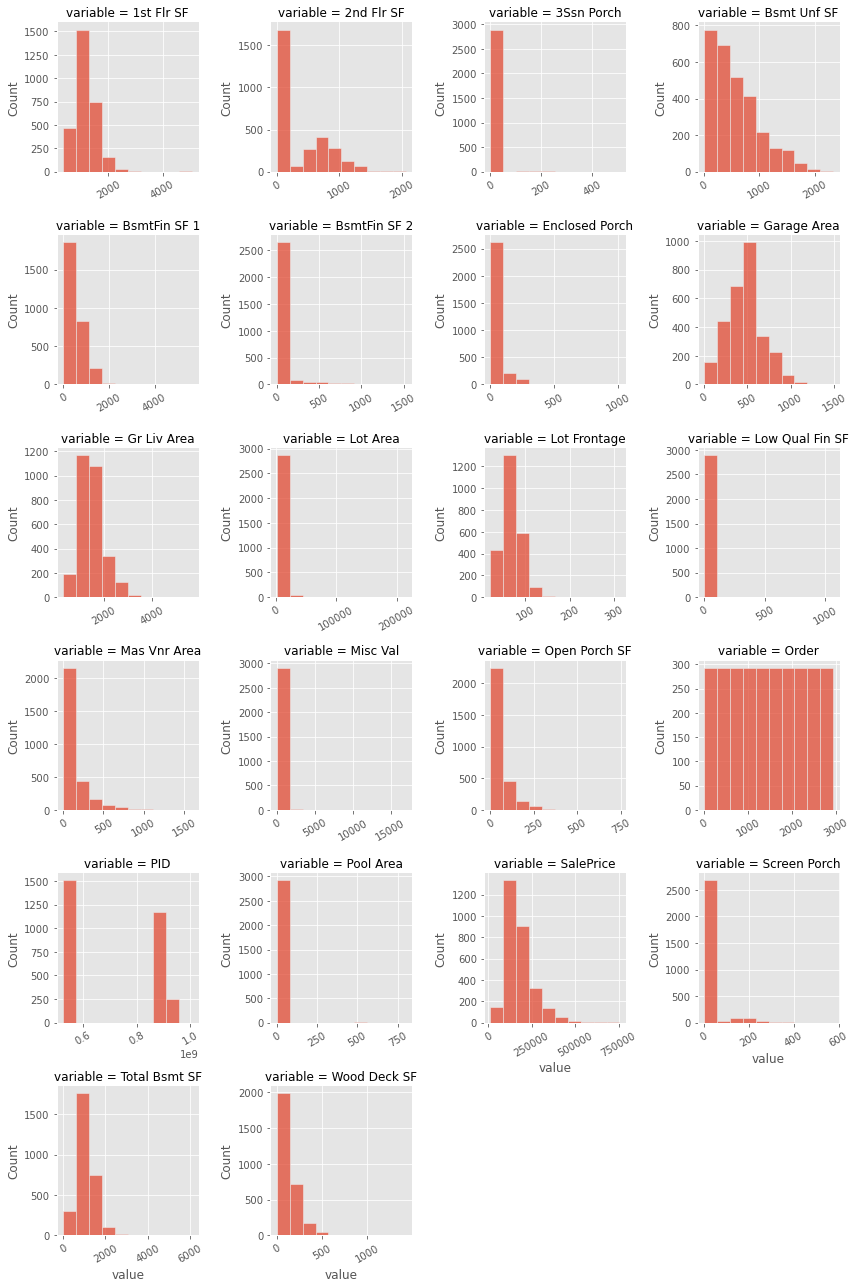

In [87]:
# plots of continous features
var = pd.melt(data, value_vars=sorted(continuous_feature))
uni_dist = sns.FacetGrid(var, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
uni_dist = uni_dist.map(sns.histplot, 'value',bins=10)
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in uni_dist.axes.flat]
uni_dist.fig.tight_layout()
plt.show()

In [88]:
##OBSERVATION for 1st one
#Some of the continuous variables  are heavily skewed and other variables seems to follow the uniform distribution.
#variables with skewed distribution would be better if we do log transformation to get more normal distribution shape.

Text(0.5, 0, 'SalePrice')

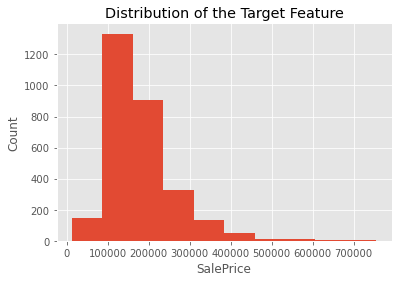

In [89]:
#Visualizing the target feature
plt.hist(target)
plt.title("Distribution of the Target Feature")
plt.ylabel("Count")
plt.xlabel("SalePrice")

In [90]:
# Second Question
#2. Visualize the dependency of the target on each continuous feature (2d scatter plot). [10 Marks]

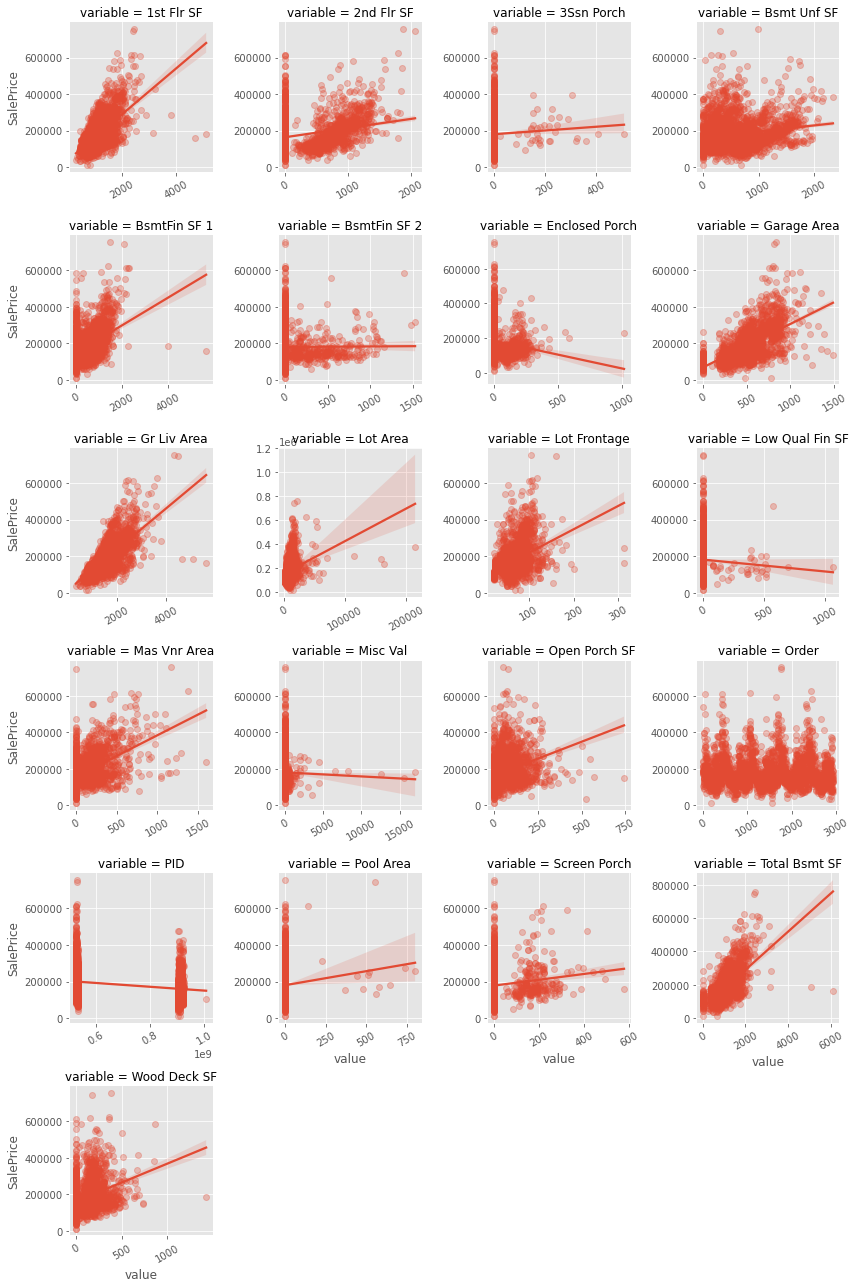

In [91]:
# Scatter plots of continous features against SalePrice
x = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(continuous_feature))
bi_dist = sns.FacetGrid(x, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
bi_dist = bi_dist.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=30) for ax in bi_dist.axes.flat]
bi_dist.fig.tight_layout()
plt.show()

In [92]:
X= data[['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
       'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition']]
y=data['SalePrice']

In [93]:
#4. Use ColumnTransformer and pipeline to encode nominal, ordinal, discrete variables. 
#Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default parameters.
#Does scaling the data (within the pipeline) with StandardScaler help? Read about ColumnTransformer below.

In [94]:
nominal_var=[ 'PID', 'MS SubClass', 'MS Zoning','Alley',
       'Street','Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
        'Foundation',
       'Heating','Central Air','Garage Type','Misc Feature', 'Sale Type',
       'Sale Condition']
ordinal_var=[ 'Lot Shape', 'Utilities','Land Slope',  'Overall Qual',
       'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu','Garage Finish','Garage Qual',
       'Garage Cond', 'Paved Drive', 'Fence','Pool QC']
discrete_var=['Year Built', 'Year Remod/Add', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath','Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd','Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold']


In [95]:
# Creating a pipeline and column tranformer
all_variables = categorical_name
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
 
column_trans = ColumnTransformer(transformers=[('cat', categorical_transformer, all_variables )])

# Creating pipelines for each model
reg = Pipeline(steps=[('preprocessor', column_trans ),('OLS', linear_model.LinearRegression())])
ridge = Pipeline(steps=[('preprocessor', column_trans ),('ridge', Ridge())])
lasso = Pipeline(steps=[('preprocessor', column_trans ),('lasso', linear_model.Lasso(tol=1))])
elastic = Pipeline(steps=[('preprocessor', column_trans ),('elastic', ElasticNet())])

In [96]:
#Spliting data into the training set and test set 
X_train, X_test, y_train, y_test = train_test_split(categorical, target, test_size=0.3,shuffle=False)

#Fit each model
reg.fit(X_train,y_train)
scores = cross_val_score(reg,X_train, y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Regression:")
print(scores)
ridge.fit(X_train,y_train)
scores = cross_val_score(ridge,X_train, y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Ridge:")
print(scores)
lasso.fit(X_train,y_train)
scores = cross_val_score(lasso,X_train, y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("Lasso:")
print(scores)
elastic.fit(X_train,y_train)
scores = cross_val_score(elastic,X_train, y_train, cv=3)
scores = sum(scores) / float(len(scores))
print("ElasticNet:")
print(scores)

Regression:
0.7881174443089104
Ridge:
0.8073445211326948
Lasso:
0.7037713902695856
ElasticNet:
0.65004956062464


In [97]:
# Create pipelines to transform categorical and continuous features
discrete_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value = 'missing')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

column_transf_scaler = ColumnTransformer(transformers=[('discrete',discrete_transformer, numeric_features),('cat', categorical_transformer,all_variables)])

# Defining classifiers for each model
cls1 = Pipeline(steps=[('initial',column_transf_scaler ),('ridge', Ridge())])
cls2 = Pipeline(steps=[('initial', column_transf_scaler ),('lasso', linear_model.Lasso(tol=1))])
cls3 = Pipeline(steps=[('initial', column_transf_scaler ),('elastic', ElasticNet())])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

#Fit each model and evaluate cross validation scores
cls1.fit(X_train,y_train)
result = cross_val_score(cls1,X_train,y_train, cv=3)
result = sum(result) / float(len(result))
print("Ridge with standard scaling:")
print(result)

cls2.fit(X_train,y_train)
result = cross_val_score(cls2,X_train,y_train, cv=3)
result = sum(result) / float(len(result))
print("Lasso with standard scaling:")
print(result)

cls3.fit(X_train,y_train)
result = cross_val_score(cls3,X_train,y_train, cv=3)
result = sum(result) / float(len(result))
print("Elastic with standard scaling:")
print(result)

Ridge with standard scaling:
0.9998404557345282
Lasso with standard scaling:
0.7603519249397482
Elastic with standard scaling:
0.9085404288781002


In [98]:
#5. Tune the parameters of the models using GridSearchCV. Do the results improve? 
#Visualize the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.  [20 Marks] 

In [99]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

# Searching the best parameter by GridCV for Ridge Regression
param_grid = {'ridge__alpha': [0.01,0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(cls1, param_grid=param_grid, cv=8,return_train_score=True)
ridge_grid.fit(X_train, y_train)
print("Mean cross-validation score of Ridge: {:.2f}".format(ridge_grid.best_score_))
print("test data score of Ridge: {:.2f}".format(ridge_grid.score(X_test, y_test)))

# Lasso Regression
param_grid = {'lasso__alpha': np.logspace(-3, 0, 13)}
lasso_grid = GridSearchCV(cls2, param_grid=param_grid, cv=8,return_train_score=True)
lasso_grid.fit(X_train, y_train)
print("Mean cross-validation score of Lasso: {:.2f}".format(lasso_grid.best_score_))
print("test data score of Lasso: {:.2f}".format(lasso_grid.score(X_test, y_test)))

# ElasticNet
param_grid = {'elastic__alpha': [0.01,0.1, 1, 10, 100]}
elastic_grid = GridSearchCV(cls3, param_grid=param_grid, cv=8,return_train_score=True)
elastic_grid.fit(X_train, y_train)
print("Mean cross-validation score of Elastic: {:.2f}".format(elastic_grid.best_score_))
print("test data score of Elastic: {:.2f}".format(elastic_grid.score(X_test, y_test)))

Mean cross-validation score of Ridge: 1.00
test data score of Ridge: 1.00
Mean cross-validation score of Lasso: 0.82
test data score of Lasso: 0.67
Mean cross-validation score of Elastic: 1.00
test data score of Elastic: 1.00


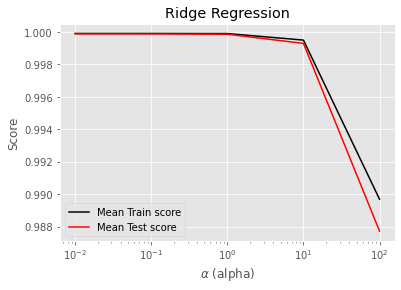

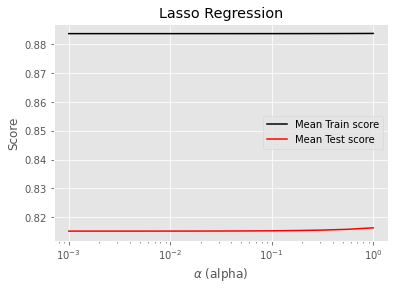

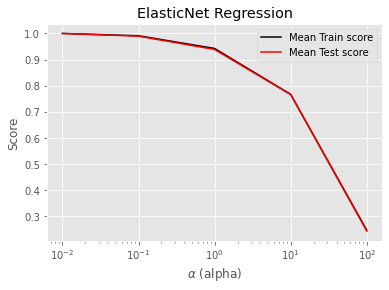

In [100]:
# Visualizing the validation score for Ridge Regression
ridge_alphas = [0.01,0.1, 1, 10, 100]
train_scores_mean = ridge_grid.cv_results_["mean_train_score"]
test_scores_mean = ridge_grid.cv_results_["mean_test_score"]
plt.figure()
plt.title('Ridge Regression')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

plt.semilogx(ridge_alphas, train_scores_mean, label='Mean Train score',color='black')
plt.semilogx(ridge_alphas, test_scores_mean,label='Mean Test score', color='red')

plt.legend(loc='best')

# Visualizing the validation score for Lasso Regression
lasso_alphas = np.logspace(-3, 0, 13)

train_scores_mean = lasso_grid.cv_results_["mean_train_score"]
test_scores_mean = lasso_grid.cv_results_["mean_test_score"]

plt.figure()
plt.title('Lasso Regression')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')

plt.semilogx(lasso_alphas, train_scores_mean, label='Mean Train score',
             color='black')
plt.semilogx(lasso_alphas, test_scores_mean,
             label='Mean Test score', color='red')

plt.legend(loc='best')
#Visualizing the validation score for ElasticNet
elastic_alphas = [0.01,0.1, 1, 10, 100]
train_scores_mean = elastic_grid.cv_results_["mean_train_score"]
test_scores_mean = elastic_grid.cv_results_["mean_test_score"]

plt.figure()
plt.title('ElasticNet Regression')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
plt.semilogx(elastic_alphas, train_scores_mean, label='Mean Train score',
             color='black')
plt.semilogx(elastic_alphas, test_scores_mean,
             label='Mean Test score', color='red')


plt.legend(loc='best')

In [103]:
#6. Visualize the coefficients of the resulting models. Do they agree on which features are important? [10 Marks]
x=len(ridge_grid.best_estimator_.steps[1][1].coef_)
y=len(lasso_grid.best_estimator_.steps[1][1].coef_)
z=len(elastic_grid.best_estimator_.steps[1][1].coef_)

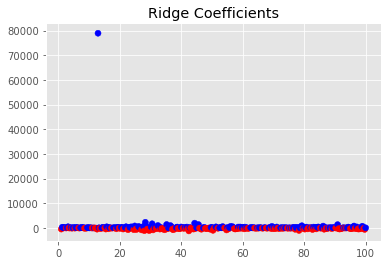

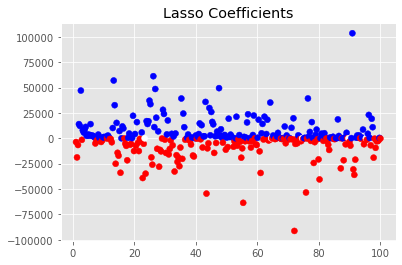

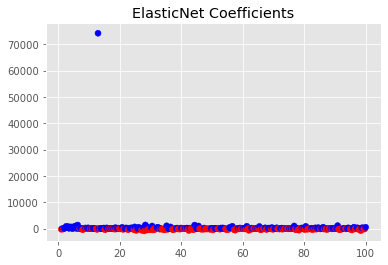

In [104]:
# Visualizing the coefficients of Ridge Regression
ridge_coef = Pipeline(steps=[('preprocessor', column_transf_scaler),('ridge', Ridge(alpha=0.01))])
ridge = ridge_coef.fit(X_train,y_train)
plt.scatter(np.linspace(1,100,x),ridge_grid.best_estimator_.steps[1][1].coef_, c=np.sign(ridge_grid.best_estimator_.steps[1][1].coef_), cmap="bwr_r")
plt.title('Ridge Coefficients')
plt.show()

# Visualizing the coefficients of Lasso Regression
lasso_coef = Pipeline(steps=[('preprocessor', column_transf_scaler), ('lasso', linear_model.Lasso(alpha=1.0,tol=1))])
lasso = lasso_coef.fit(X_train,y_train)
plt.scatter(np.linspace(1,100,y),lasso_grid.best_estimator_.steps[1][1].coef_,c=np.sign(lasso_grid.best_estimator_.steps[1][1].coef_), cmap="bwr_r")
plt.title('Lasso Coefficients')
plt.show()

#Visualizing the coefficients of ElasticNet
elastic_coef = Pipeline(steps=[('preprocessor',column_transf_scaler),('elastic', ElasticNet(alpha=0.1))])
elastic = elastic_coef.fit(X_train,y_train)
plt.scatter(np.linspace(1,100,z),elastic_grid.best_estimator_.steps[1][1].coef_,c=np.sign(elastic_grid.best_estimator_.steps[1][1].coef_), cmap="bwr_r")
plt.title('ElasticNet Coefficients')
plt.show()

In [ ]:
#3. For each categorical (nominal) variable, cross-validate a Linear Regression model using just this variable
#(one-hot-encoded).
#Visualize the relationship of the categorical variables that provide the best R^2 value with the target. [20 Marks]  

In [ ]:
dict1 = {}
for i in range(len(categorical_name)):
    
    
    encoder = OneHotEncoder(sparse=False)
    encode=ohe.fit_transform(data[[ 'PID', 'MS SubClass', 'MS Zoning','Alley',
       'Street','Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
        'Foundation',
       'Heating','Central Air','Garage Type','Misc Feature', 'Sale Type',
       'Sale Condition']])
    X_train, X_test, y_train, y_test = train_test_split(encode, target, test_size=0.3)
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train_scaled,y_train)
    scores = cross_val_score(model,encode,target, cv=5, scoring='r2')
    avg = sum(scores) / float(len(scores))
    dict1.update({categorical_name[i]:avg})
    
sorted_dic = sorted(dict1_.items(), key=lambda v: v[1], reverse=True)
print(sorted_dic[0:3])

In [ ]:
# Storing the highest R^2 features into another dataframe
cat = categorical[['Neighborhood']]

# Ploting hist correspoinding to that r2 value feature
f, axes = plt.subplots(1,figsize=(15,5))
sns.countplot(cat['Neighborhood'], color='black', ax=axes[0])
